# Análise exploratória de dados

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Coleta de dados

In [50]:
data = pd.read_csv('../data/processed/preprocessing.csv')
data

,Carga Horária,Categoria da Situação,Código da Matrícula,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
0,4560,Concluintes,72082427,branca,2017-04-07,2019-12-21,15 a 19 anos,1.000,18.0,CPII,2019-12-01,Região Sudeste,"1,5<RFP<=2,5",Feminino,Matutino,RJ,Campus Tijuca II
1,4560,Concluintes,72082311,branca,2017-04-07,2019-12-21,15 a 19 anos,1.000,18.0,CPII,2019-12-01,Região Sudeste,Não declarada,Masculino,Matutino,RJ,Campus Tijuca II
2,4560,Concluintes,72082437,branca,2017-04-07,2019-12-21,15 a 19 anos,1.000,18.0,CPII,2019-12-01,Região Sudeste,"RFP>3,5",Feminino,Matutino,RJ,Campus Tijuca II
3,4560,Concluintes,72898296,branca,2017-04-07,2019-12-21,15 a 19 anos,1.000,18.0,CPII,2019-12-01,Região Sudeste,Não declarada,Feminino,Matutino,RJ,Campus Tijuca II
4,4560,Concluintes,72082281,branca,2017-04-07,2019-12-21,15 a 19 anos,1.000,18.0,CPII,2019-12-01,Região Sudeste,"RFP>3,5",Feminino,Matutino,RJ,Campus Tijuca II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,3600,Concluintes,84230653,branca,2018-02-26,2020-12-31,15 a 19 anos,1.067,19.0,UFSM - POLITÉCNICO,2021-02-01,Região Sul,Não declarada,Feminino,Matutino,RS,Colégio Politécnico da UFSM
4246,3600,Concluintes,84224256,branca,2018-02-26,2020-12-31,15 a 19 anos,1.067,18.0,UFSM - POLITÉCNICO,2021-02-01,Região Sul,Não declarada,Feminino,Matutino,RS,Colégio Politécnico da UFSM
4247,3600,Concluintes,84224068,parda,2018-02-26,2020-12-31,15 a 19 anos,1.067,19.0,UFSM - POLITÉCNICO,2021-02-01,Região Sul,Não declarada,Feminino,Matutino,RS,Colégio Politécnico da UFSM
4248,2460,Concluintes,84799648,branca,2018-02-06,2020-12-20,15 a 19 anos,1.067,18.0,UFRPE - CODAI,2021-06-01,Região Nordeste,"0<RFP<=0,5",Masculino,Vespertino,PE,Colégio Agrícola Dom Agostinho Ikas da UFRPE


## 2. Descrição dos dados





### 2.1. Dicionário de dados

In [51]:
dicionario = pd.read_csv('../data/external/dicionario.csv', sep=',')
dicionario

,Variável,Significado,Tipo,Subtipo
0,Carga Horária,Carga horária do ciclo de matrícula.,Quantitativa,Discreta
1,Categoria da Situação,"Situações de matrícula: concluintes, em curso ...",Qualitativa,Nominal
2,Código da Matrícula,Código da matrícula.,Quantitativa,Discreta
3,Cor/Raça,Cor/Raça do aluno.,Qualitativa,Nominal
4,Data de Início do Ciclo,Data de início do ciclo de matrícula.,Quantitativa,Discreta
5,Data de Fim Previsto do Ciclo,Data prevista para o final do ciclo de matrícula.,Quantitativa,Discreta
6,Faixa Etária,Agrupamento baseado na idade dos estudantes.,Qualitativa,Ordinal
7,Fator Esforço Curso,Ajusta a contagem de matrículas-equivalentes p...,Quantitativa,Continua
8,Idade,Idade do estudante.,Quantitativa,Discreta
9,Instituição,Sigla da Instituição.,Qualitativa,Nominal


In [52]:
data.select_dtypes(include='object')

,Categoria da Situação,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
0,Concluintes,branca,2017-04-07,2019-12-21,15 a 19 anos,CPII,2019-12-01,Região Sudeste,"1,5<RFP<=2,5",Feminino,Matutino,RJ,Campus Tijuca II
1,Concluintes,branca,2017-04-07,2019-12-21,15 a 19 anos,CPII,2019-12-01,Região Sudeste,Não declarada,Masculino,Matutino,RJ,Campus Tijuca II
2,Concluintes,branca,2017-04-07,2019-12-21,15 a 19 anos,CPII,2019-12-01,Região Sudeste,"RFP>3,5",Feminino,Matutino,RJ,Campus Tijuca II
3,Concluintes,branca,2017-04-07,2019-12-21,15 a 19 anos,CPII,2019-12-01,Região Sudeste,Não declarada,Feminino,Matutino,RJ,Campus Tijuca II
4,Concluintes,branca,2017-04-07,2019-12-21,15 a 19 anos,CPII,2019-12-01,Região Sudeste,"RFP>3,5",Feminino,Matutino,RJ,Campus Tijuca II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,Concluintes,branca,2018-02-26,2020-12-31,15 a 19 anos,UFSM - POLITÉCNICO,2021-02-01,Região Sul,Não declarada,Feminino,Matutino,RS,Colégio Politécnico da UFSM
4246,Concluintes,branca,2018-02-26,2020-12-31,15 a 19 anos,UFSM - POLITÉCNICO,2021-02-01,Região Sul,Não declarada,Feminino,Matutino,RS,Colégio Politécnico da UFSM
4247,Concluintes,parda,2018-02-26,2020-12-31,15 a 19 anos,UFSM - POLITÉCNICO,2021-02-01,Região Sul,Não declarada,Feminino,Matutino,RS,Colégio Politécnico da UFSM
4248,Concluintes,branca,2018-02-06,2020-12-20,15 a 19 anos,UFRPE - CODAI,2021-06-01,Região Nordeste,"0<RFP<=0,5",Masculino,Vespertino,PE,Colégio Agrícola Dom Agostinho Ikas da UFRPE


In [53]:
data ['UF'].unique()

array(['RJ', 'MG', 'PI', 'RS', 'PB', 'PE'], dtype=object)

In [54]:
categorica = data.select_dtypes(include='object')

In [55]:
data.select_dtypes(exclude='object')

,Carga Horária,Código da Matrícula,Fator Esforço Curso,Idade
0,4560,72082427,1.000,18.0
1,4560,72082311,1.000,18.0
2,4560,72082437,1.000,18.0
3,4560,72898296,1.000,18.0
4,4560,72082281,1.000,18.0
...,...,...,...,...
4245,3600,84230653,1.067,19.0
4246,3600,84224256,1.067,18.0
4247,3600,84224068,1.067,19.0
4248,2460,84799648,1.067,18.0


In [56]:
numerica = data.select_dtypes(exclude='object')

## 3. Perguntas de partida e hipóteses

### Qual a distribuição dos dados (variável por variável)?

In [57]:
data.describe(include='all')

,Carga Horária,Categoria da Situação,Código da Matrícula,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
count,4250.000000,4250,4.250000e+03,4250,4250,4250,4250,4250.000000,4250.000000,4250,4250,4250,4250,4250,4250,4250,4250
unique,NaN,2,NaN,6,44,41,8,NaN,NaN,10,84,3,7,2,4,6,18
top,NaN,Concluintes,NaN,branca,2017-04-07,2019-12-21,15 a 19 anos,NaN,NaN,CPII,2020-01-01,Região Sudeste,Não declarada,Feminino,Matutino,RJ,Campus São Cristóvão III
freq,NaN,3279,NaN,1937,1185,1219,3471,NaN,NaN,2828,1066,3233,1409,2211,2690,3008,588
mean,3991.135294,NaN,8.094893e+07,NaN,NaN,NaN,NaN,1.028944,18.494118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,932.709563,NaN,8.801851e+06,NaN,NaN,NaN,NaN,0.033193,1.602125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2400.000000,NaN,5.834909e+07,NaN,NaN,NaN,NaN,1.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2800.000000,NaN,7.248616e+07,NaN,NaN,NaN,NaN,1.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4560.000000,NaN,8.512098e+07,NaN,NaN,NaN,NaN,1.000000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4560.000000,NaN,8.703046e+07,NaN,NaN,NaN,NaN,1.067000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Distribuição das variáveis qualitativas

In [58]:
def show_bars(subplot_value, x_value, hue_value, dataset, palette='plasma', order=None):
    plt.subplot(subplot_value)
    ax = sns.countplot(x = x_value, hue = hue_value, data = dataset,palette=palette, order=order)
    # ax.set(xlabel = x_value, ylabel = 'Quantidade e Percentual')
    x_value = x_value.replace('_',' ')
    x_value = x_value.replace(x_value[0],x_value[0].upper())
    ax.set_xlabel(x_value, fontsize=15)
    ax.set_ylabel("Quantidade e Percentual", fontsize=15)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(True)
    #ax.spines['bottom'].set_visible(True)
    ax.legend(fontsize=15)
    
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    
    for bars in ax.containers:
        for x, p in enumerate(bars):
            total = sum(xgroup[x] for xgroup in all_heights) 
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(f'{p.get_height()}\n{percentage}', (p.get_x() + p.get_width() / 2, p.get_height()), size=12, ha='center', va='bottom')
   

    x_ticks = [item.get_text() for item in ax.get_xticklabels()]
    if len(x_ticks[0]) > 10:
        ax.set_xticklabels(x_ticks, rotation=45, fontsize=12)
    else:
        ax.set_xticklabels(x_ticks, fontsize=12)

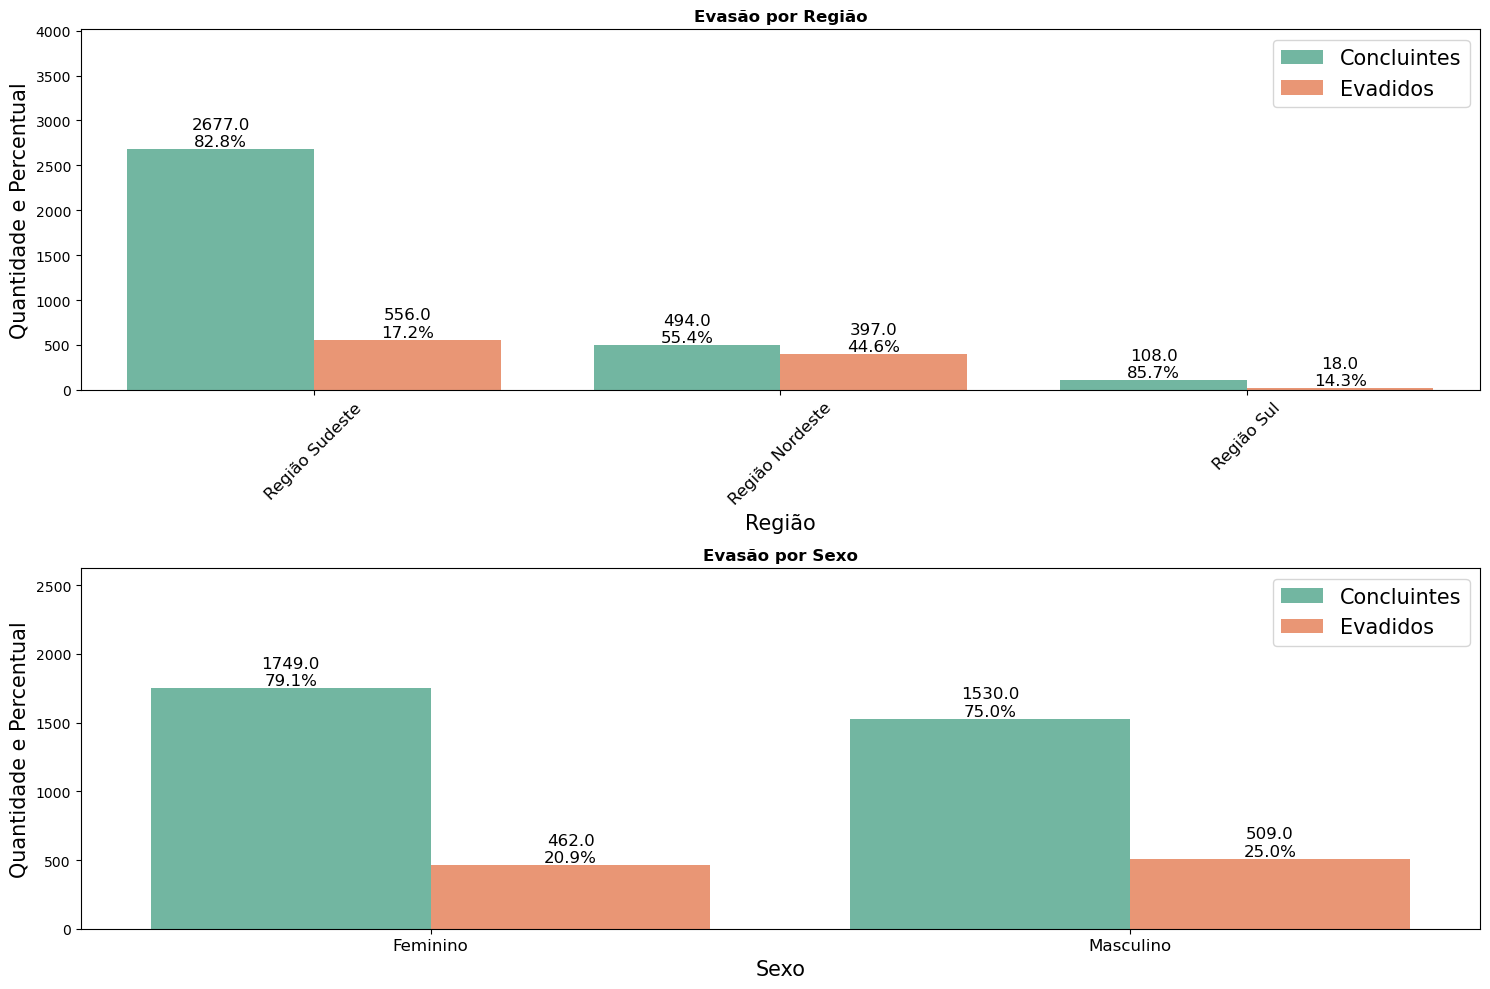

In [59]:
plt.figure(figsize=(15, 10))
show_bars(211, 'Região', 'Categoria da Situação', data, palette='Set2')
plt.title('Evasão por Região',fontweight='bold')
plt.margins(y=0.5)  
show_bars(212, 'Sexo', 'Categoria da Situação', data, palette='Set2')
plt.title('Evasão por Sexo',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

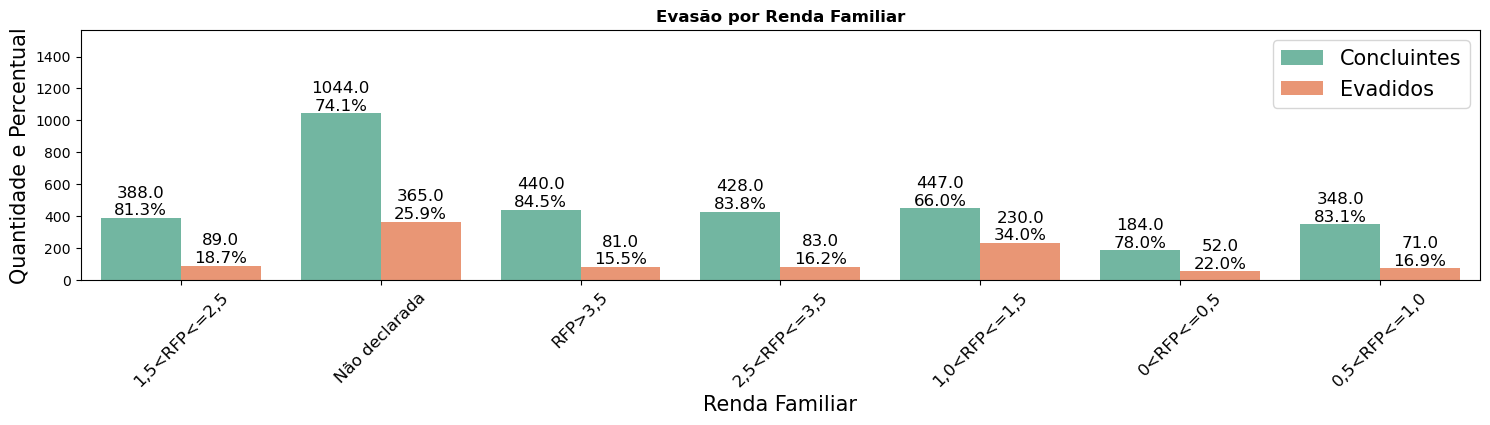

In [60]:
plt.figure(figsize=(15, 7))
show_bars(211, 'Renda Familiar', 'Categoria da Situação', data, palette='Set2')
plt.title('Evasão por Renda Familiar',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

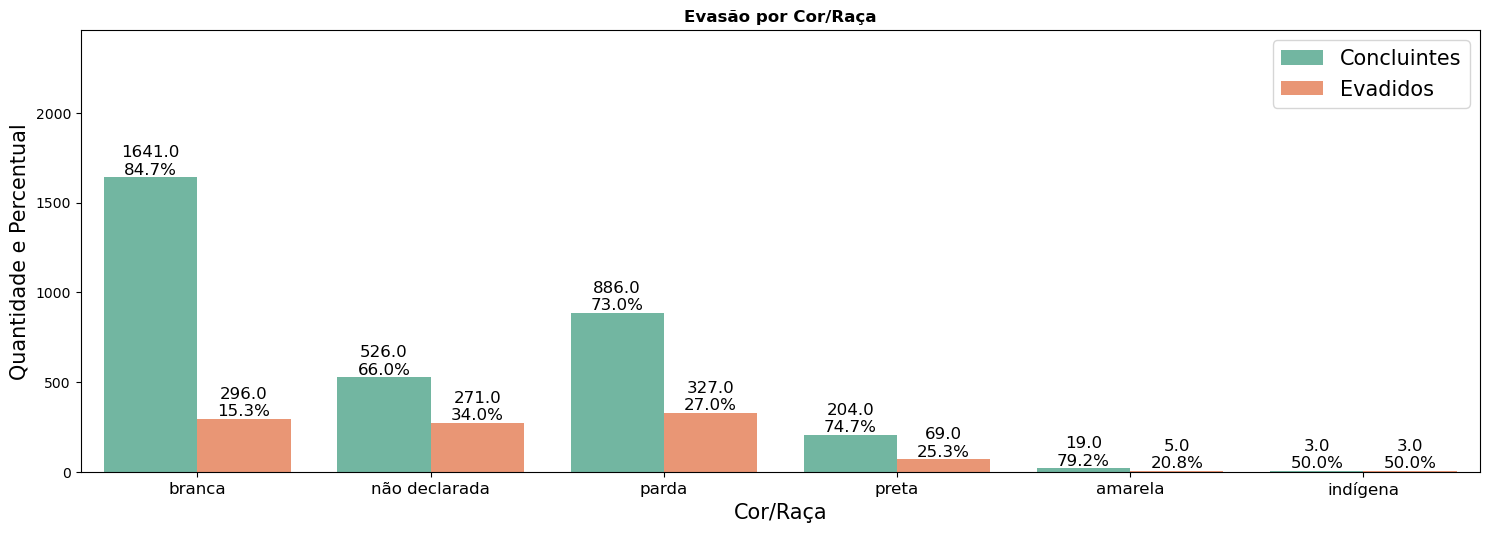

In [61]:
plt.figure(figsize=(15, 10))
show_bars(211, 'Cor/Raça', 'Categoria da Situação', categorica, palette='Set2')
plt.title('Evasão por Cor/Raça',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

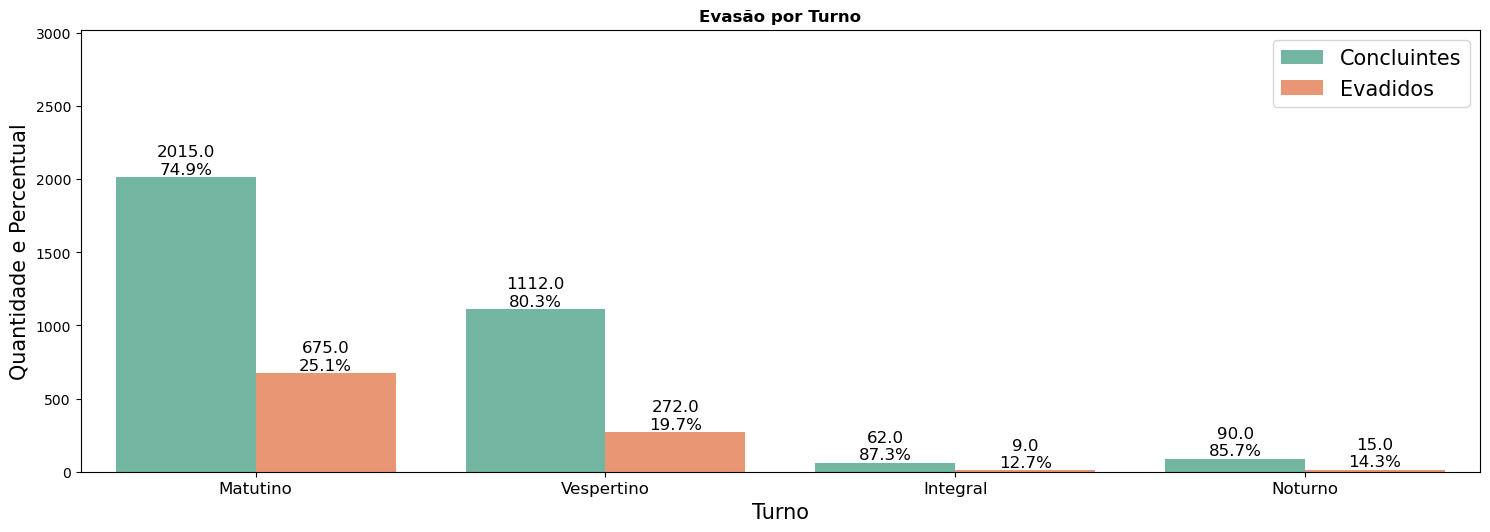

In [62]:
plt.figure(figsize=(15, 10))
show_bars(212, 'Turno', 'Categoria da Situação', categorica, palette='Set2')
plt.title('Evasão por Turno',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

In [63]:
faixa_ate_29anos = categorica[categorica['Faixa Etária'].isin(['15 a 19 anos', '20 a 24 anos','25 a 29 anos'])]

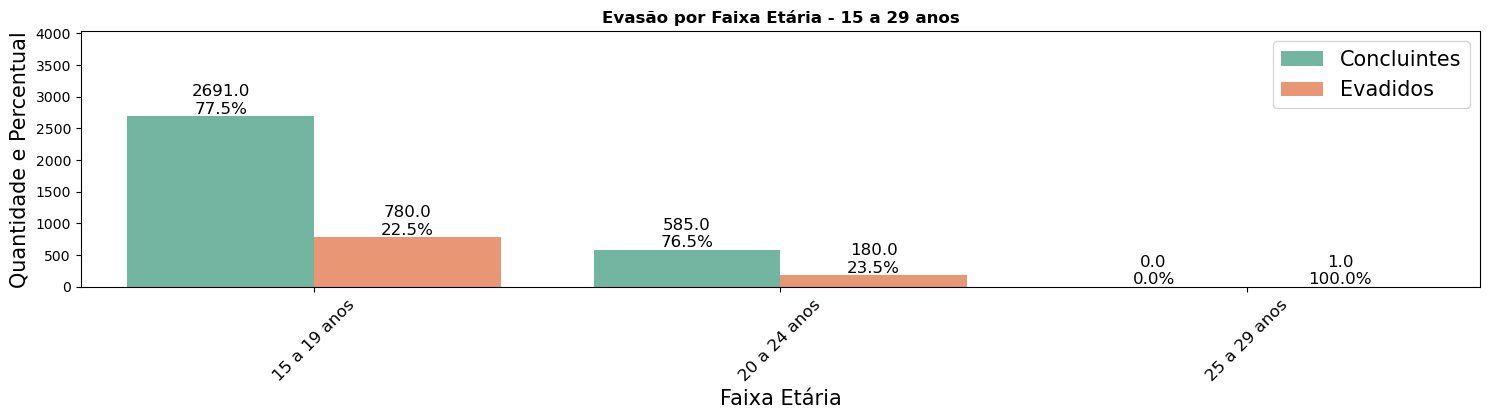

In [64]:
plt.figure(figsize=(15, 7))
show_bars(211, 'Faixa Etária', 'Categoria da Situação', faixa_ate_29anos, palette='Set2')
plt.title('Evasão por Faixa Etária - 15 a 29 anos',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

In [65]:
faixa_acima_29anos = categorica[categorica['Faixa Etária'].isin(['30 a 34 anos', '35 a 39 anos', '55 a 59 anos', 'Maior de 60 anos',
       '50 a 54 anos', '45 a 49 anos'])]

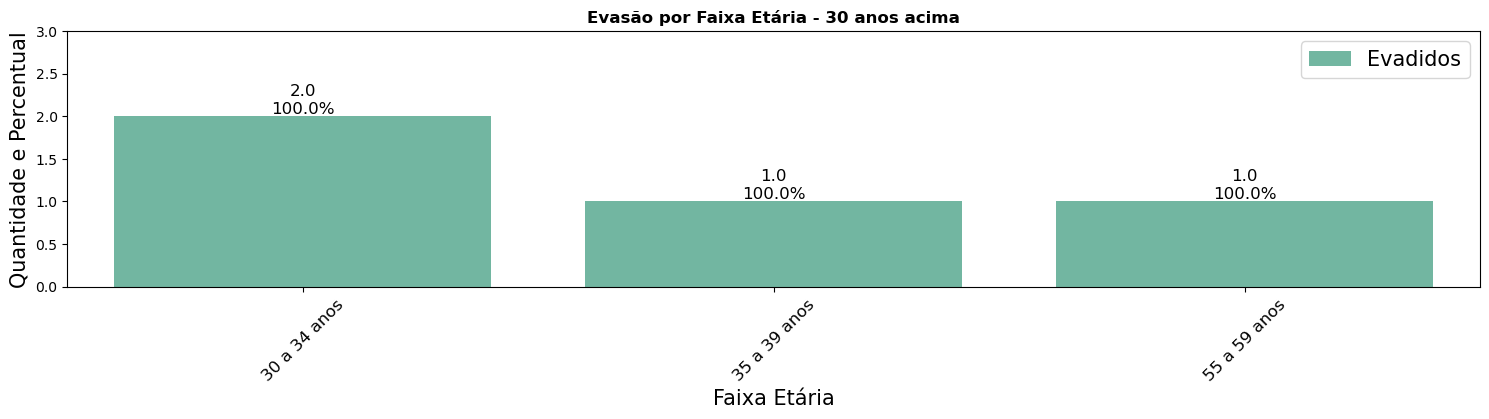

In [66]:
plt.figure(figsize=(15, 7))
show_bars(211, 'Faixa Etária', 'Categoria da Situação', faixa_acima_29anos, palette='Set2')
plt.title('Evasão por Faixa Etária - 30 anos acima',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

In [67]:
evadidos_ordenados=pd.crosstab(categorica['Unidade de Ensino'], categorica['Categoria da Situação'], normalize='index').reset_index().sort_values('Evadidos', ascending=False)
evadidos_ordenados=evadidos_ordenados[evadidos_ordenados['Evadidos']<1].head(20)

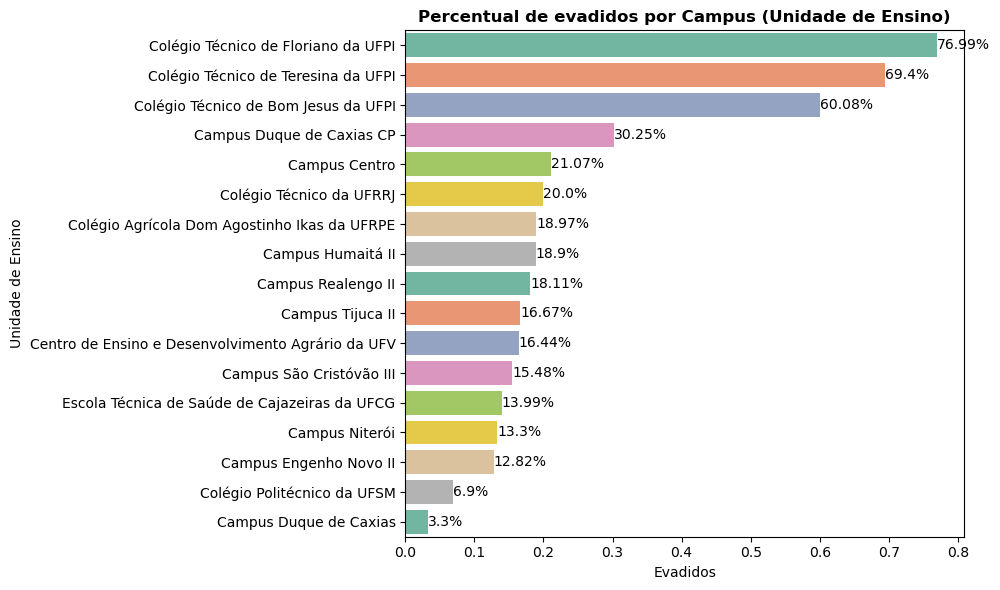

In [77]:
plt.figure(figsize=(10, 6))
ax= sns.barplot(evadidos_ordenados,y='Unidade de Ensino',x='Evadidos', palette='Set2')
ax.bar_label(ax.containers[0], fmt=lambda x:f'{round(x*100,2)}%')
plt.title("Percentual de evadidos por Campus (Unidade de Ensino)",
          fontweight='bold')
plt.tight_layout()

In [69]:
uf_nova=pd.crosstab(categorica['UF'], categorica['Categoria da Situação'], normalize='index').reset_index().sort_values('Evadidos', ascending=False)
uf_nova=uf_nova[uf_nova['Evadidos']<1].head(20)

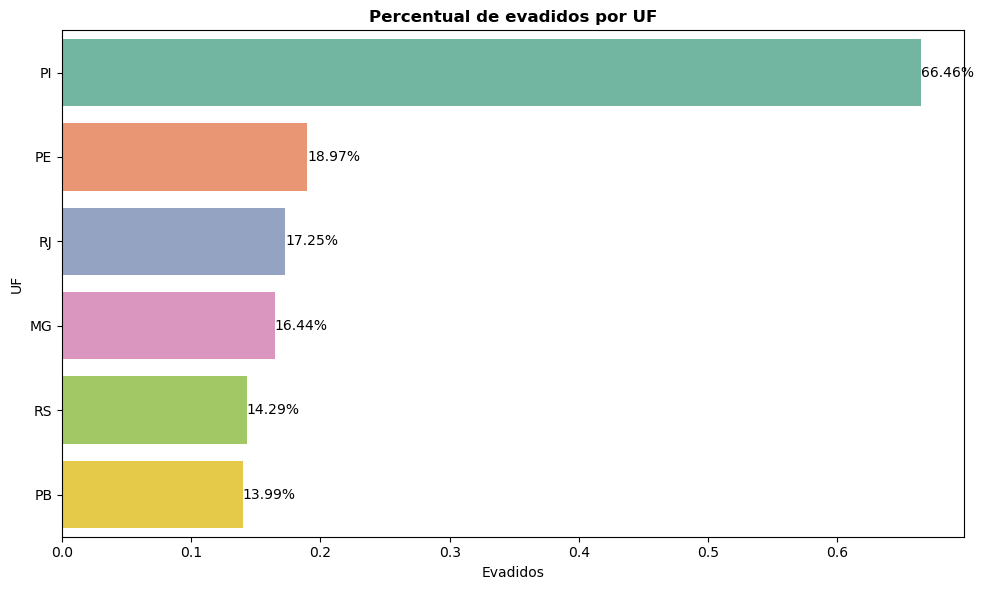

In [78]:
plt.figure(figsize=(10, 6))
ax= sns.barplot(uf_nova,y='UF',x='Evadidos', palette='Set2')
ax.bar_label(ax.containers[0], fmt=lambda x:f'{round(x*100,2)}%')
plt.title("Percentual de evadidos por UF",
          fontweight='bold')
plt.tight_layout()

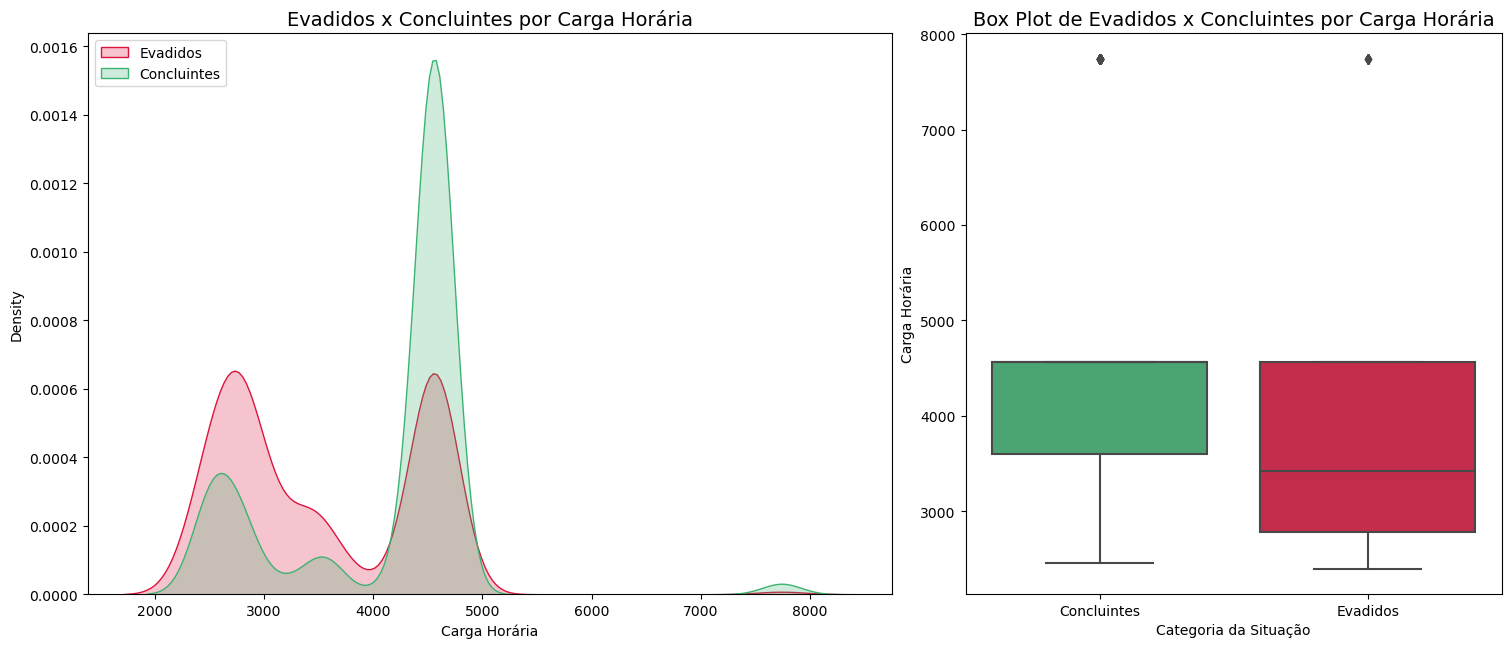

In [81]:
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

gs = GridSpec(2, 5, figure=fig)
ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3:])

sns.kdeplot(data[data['Categoria da Situação']=='Evadidos']['Carga Horária'], ax=ax1,
             color='crimson', shade=True, label='Evadidos')
sns.kdeplot(data[data['Categoria da Situação']=='Concluintes']['Carga Horária'], ax=ax1,
             color='mediumseagreen', shade=True, label='Concluintes')
ax1.set_title('Evadidos x Concluintes por Carga Horária', size=14)
ax1.legend(loc='upper left')

sns.boxplot(x='Categoria da Situação', y='Carga Horária', data=data, palette=['mediumseagreen','crimson'], ax=ax2)
ax2.set_title('Box Plot de Evadidos x Concluintes por Carga Horária', size=14)
fig.show()

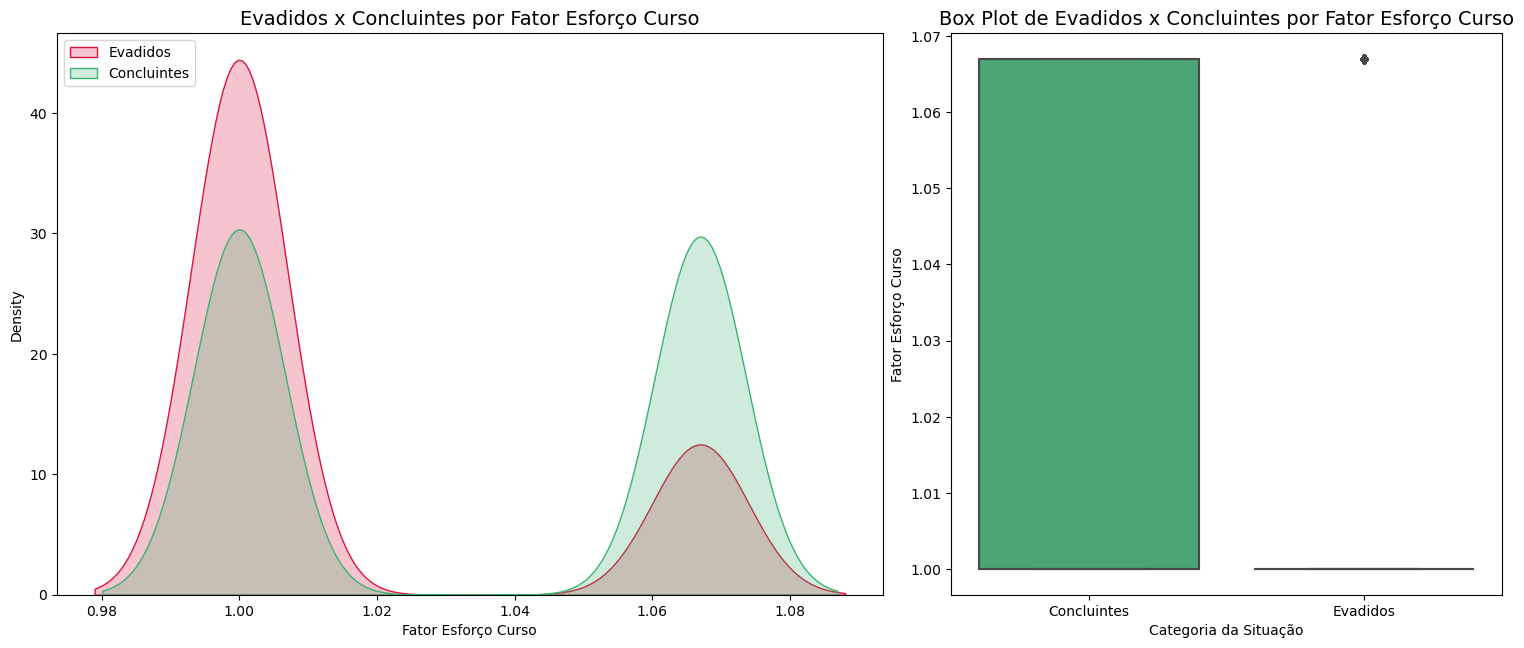

In [82]:
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

gs = GridSpec(2, 5, figure=fig)
ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3:])

sns.kdeplot(data[data['Categoria da Situação']=='Evadidos']['Fator Esforço Curso'], ax=ax1,
             color='crimson', shade=True, label='Evadidos')
sns.kdeplot(data[data['Categoria da Situação']=='Concluintes']['Fator Esforço Curso'], ax=ax1,
             color='mediumseagreen', shade=True, label='Concluintes')
ax1.set_title('Evadidos x Concluintes por Fator Esforço Curso', size=14)
ax1.legend(loc='upper left')

sns.boxplot(x='Categoria da Situação', y='Fator Esforço Curso', data=data, palette=['mediumseagreen', 'crimson'], ax=ax2)
ax2.set_title('Box Plot de Evadidos x Concluintes por Fator Esforço Curso', size=14)
fig.show()

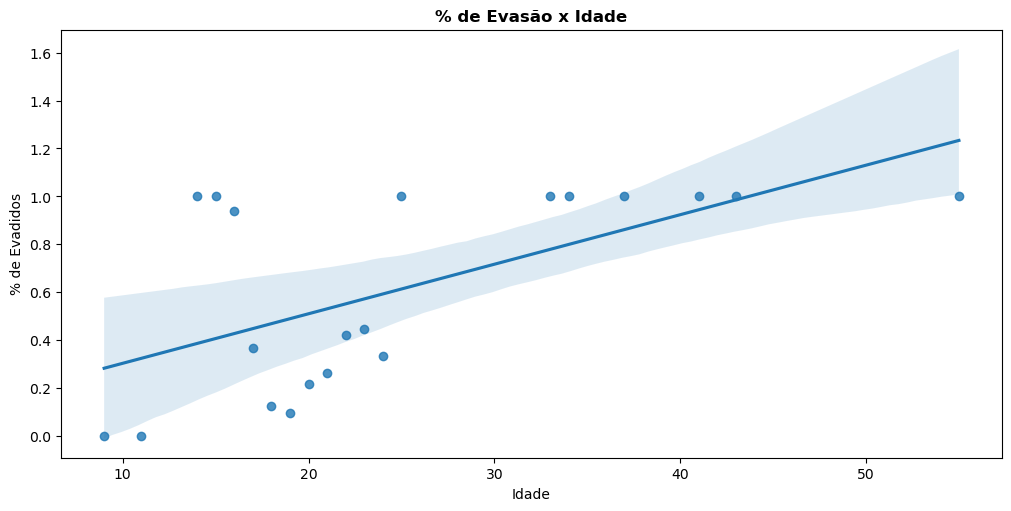

In [73]:
aux = pd.crosstab(data['Idade'],data['Categoria da Situação'], normalize='index').reset_index()
aux.rename(columns={'Evadidos':'% de Evadidos'}, inplace=True)
plt.figure(constrained_layout=True, figsize=(10, 5))
plt.title('% de Evasão x Idade',fontweight='bold')
sns.regplot(aux,x='Idade',y='% de Evadidos')
plt.show()

In [74]:
data['Data de Início do Ciclo'] = pd.to_datetime(data['Data de Início do Ciclo'])
data['Data de Fim Previsto do Ciclo'] = pd.to_datetime(data['Data de Fim Previsto do Ciclo'])
data['Mês de Ocorrência da Situação'] = pd.to_datetime(data['Mês de Ocorrência da Situação'])

In [75]:
data ['mes'] = data['Mês de Ocorrência da Situação'].dt.month_name()
ordem = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

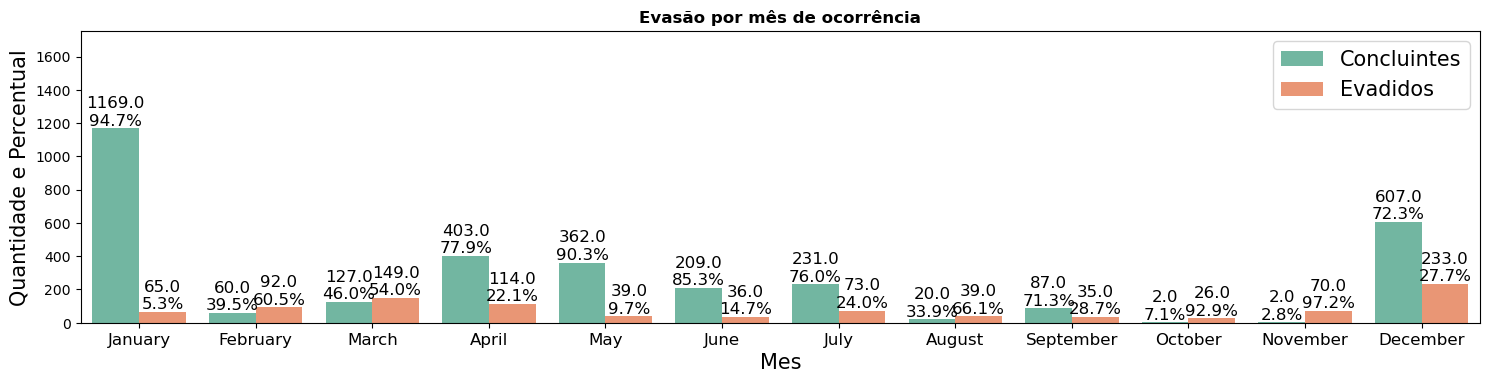

In [84]:
plt.figure(figsize=(15, 7))
show_bars(211, 'mes', 'Categoria da Situação', data, palette='Set2', order=ordem)
plt.title('Evasão por mês de ocorrência',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

## 4. Percepções


## 5. Observação